In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

2023-04-25 08:42:26.221903: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 08:42:26.402879: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
test=pd.read_csv('./dataset/mnist_test.csv')
train=pd.read_csv('./dataset/mnist_train.csv')

In [3]:
train.shape,test.shape

((60000, 785), (10000, 785))

In [4]:
x_train=train.drop('label',axis=1)
x_test=test.drop('label',axis=1)
y_train=train['label']
y_test=test['label']

In [5]:
x_train=x_train.values.reshape(-1,28,28)
x_test=x_test.values.reshape(-1,28,28)

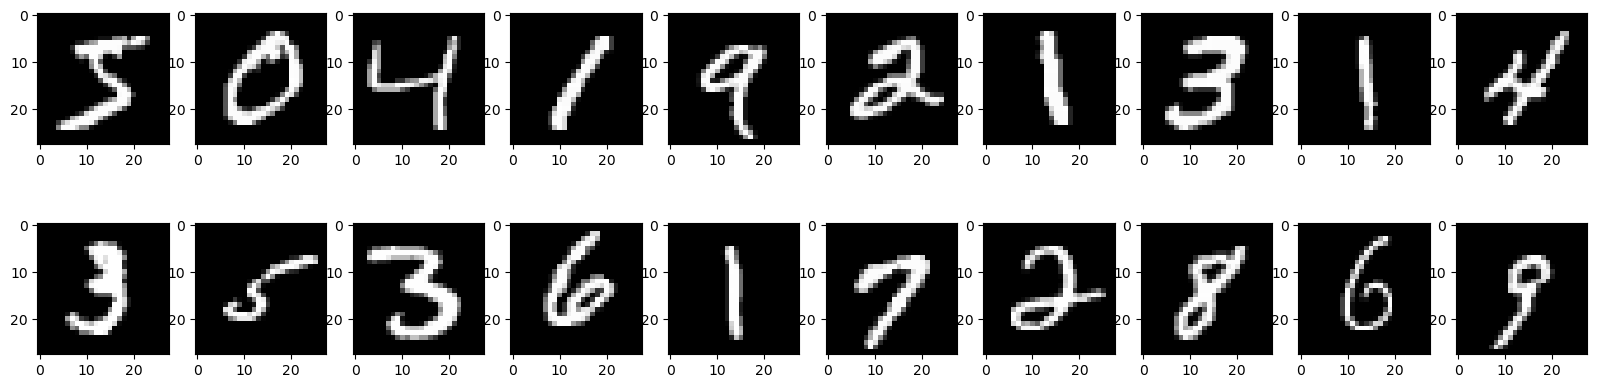

In [6]:
plt.figure(figsize=(20,5))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(x_train[i],cmap='gray')

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64


<Axes: ylabel='count'>

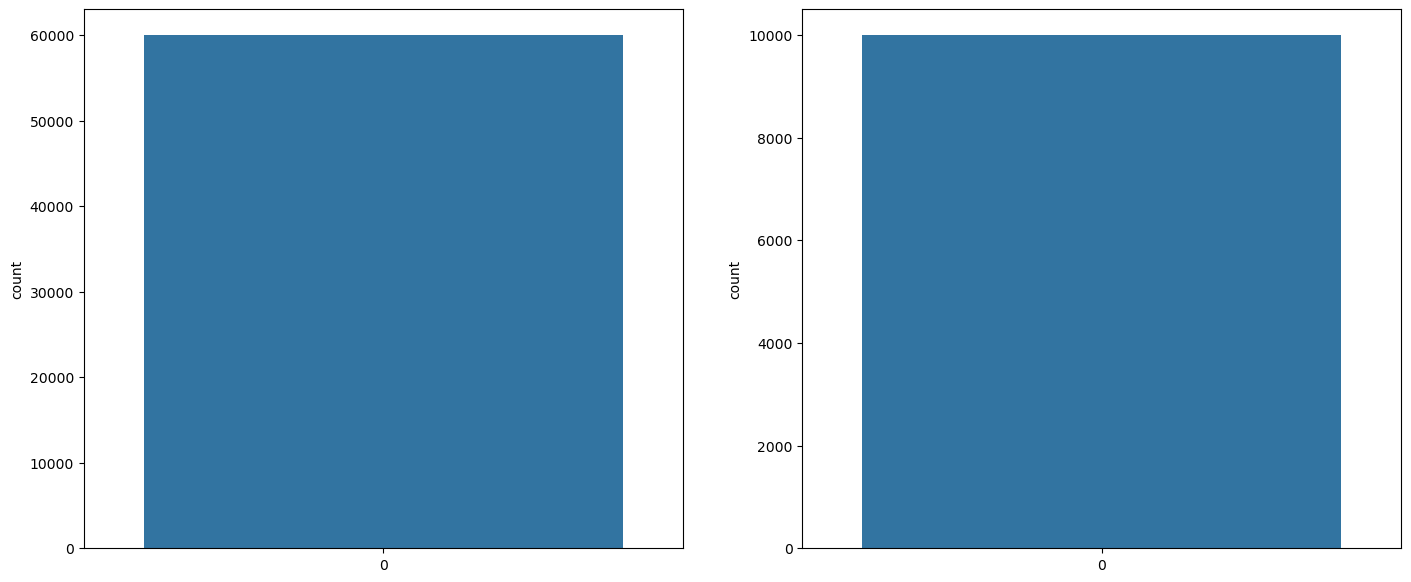

In [7]:
print(y_train.value_counts())
print(y_test.value_counts())
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sbn.countplot(y_train)
plt.subplot(1,2,2)
sbn.countplot(y_test)

In [8]:
x_train= x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [9]:
from keras.utils.np_utils import to_categorical 
y_train = to_categorical(y_train, num_classes = 10)
y_test= to_categorical(y_test, num_classes = 10)

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [11]:
datagen=ImageDataGenerator(shear_range=0.3,
                   horizontal_flip=True,
                   zoom_range=0.3)

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.0001)

In [13]:
model = Sequential()

model.add(Conv2D(32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(28,28,1),
                 kernel_initializer='he_normal',
                 strides=1,
                 padding='same'))

model.add(MaxPool2D(pool_size=(2,2),
                    strides=2,
                    padding='same'))

model.add(Dropout(0.25))

model.add(Conv2D(64,
                 kernel_size=(3,3),
                 activation='relu',
                 strides=1,
                 padding='same'))
model.add(MaxPool2D(pool_size=(2,2),
                    strides=2,
                    padding='same'))
model.add(Dropout(0.40))

model.add(Conv2D(128,
                 kernel_size=(3,3),
                 activation='relu',
                 strides=1,
                 padding='same'))
model.add(MaxPool2D(pool_size=(2,2),
                    strides=2,
                    padding='same'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2023-04-25 08:46:31.074779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 08:46:31.103858: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 08:46:31.104002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 08:46:31.105266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 08:46:31.105398: I tensorflow/compiler/xla/stream_executo

In [14]:
history = model.fit(datagen.flow(x_train,y_train),batch_size=120,epochs=30,validation_data=(x_test,y_test),callbacks=learning_rate_reduction)

Epoch 1/30


2023-04-25 08:46:45.754501: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-04-25 08:46:46.665383: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-04-25 08:46:47.885891: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 12s 4ms/step - loss: 0.4311 - accuracy: 0.8570 - val_loss: 0.0704 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1764 - accuracy: 0.9446 - val_loss: 0.0555 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1429 - accuracy: 0.9556 - val_loss: 0.0525 - val_accuracy: 0.9838 - lr: 0.0010
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1242 - accuracy: 0.9609 - val_loss: 0.0514 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1168 - accuracy: 0.9629 - val_loss: 0.0378 - val_accuracy: 0.9869 - lr: 0.0010
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1089 - accuracy: 0.9664 - val_loss: 0.0419 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/

In [15]:
print('Accurucy of the model:',model.evaluate(x_test,y_test)[1]*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9929
Accurucy of the model: 99.2900013923645


Text(0, 0.5, 'Loss')

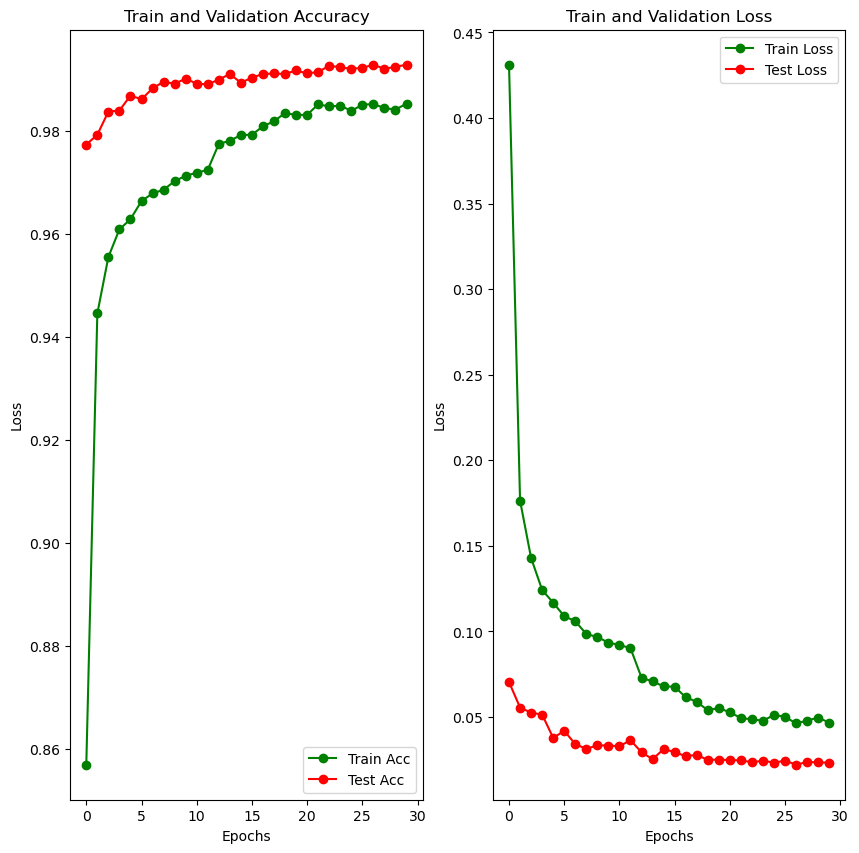

In [16]:
epochs = [i for i in range(30)]

fig,ax= plt.subplots(1,2)
train_acc= history.history['accuracy']
train_loss= history.history['loss']
vall_acc= history.history['val_accuracy']
vall_loss=history.history['val_loss']
fig.set_size_inches(10,10)

ax[0].plot(epochs, train_acc, 'go-', label='Train Acc')
ax[0].plot(epochs, vall_acc, 'ro-', label= 'Test Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, train_loss, 'go-', label='Train Loss')
ax[1].plot(epochs, vall_loss, 'ro-', label= 'Test Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

313/313 [==============================] - 0s 650us/step


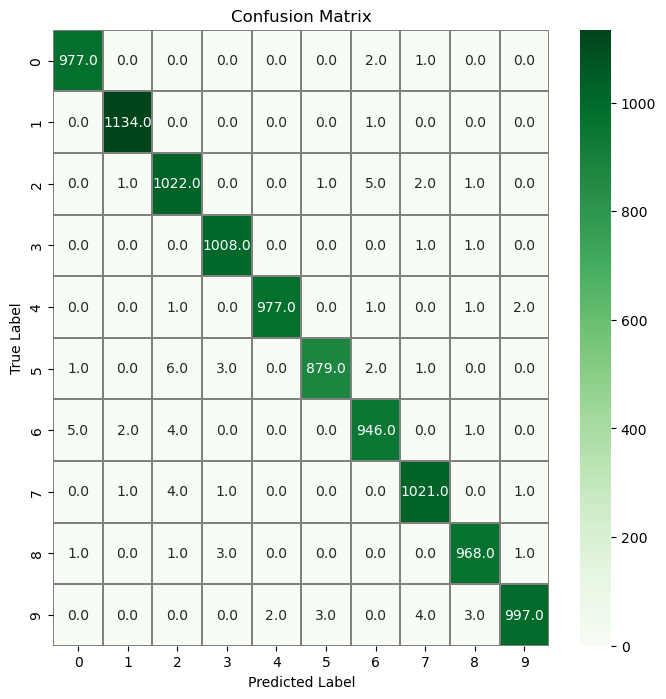

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()